In [1]:
# import glob
# [_.split('/')[-1] for _ in glob.glob('../*.txt')]

In [2]:
import glob
import pandas as pd
import pickle
import sys
import os
dir_path = '/'.join(os.path.realpath('.').split('/')[:-1])
sys.path.append(f'{dir_path}/sabatinilab-glm/backend')
sys.path.append(f'{dir_path}/..')
sys.path.append(f'{dir_path}/backend')
sys.path.append(f'{dir_path}/../backend')

import sglm
import sglm_cv
import sglm_pp
import sglm_ez
import sglm_plt as splt
import sglm_save as ssave
import lynne_pp as lpp
from tqdm import tqdm, trange

# gdat = pickle.load(open('../../model_outputs/ssave/77_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_unrewarded_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_unrewarded_cvsize=.05_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_unrewarded_cvsize=.01_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/w_unrewarded_cvsize=.01_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv2_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv2_maxiter10k_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv_shuffle_kwargs_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne2_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne_purel1l2_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne_w_dummy_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))




In [3]:
# prefix = 'new_lynne_linear_only_refac'
# prefix = 'new_lynne_minl2_only_refac'
# prefix = 'investig_resolved'
# prefix = 'r_trial-r-refit'
# prefix = 'r_concat2'
# prefix = 'allsess_fit_multi_alpha'
# prefix = 'manysess_individ-nohyp'
# prefix = 'table_based-v02'
# prefix = 'table_based-v04'
# prefix = 'table_based-v05-addlcols'
# prefix = 'table_based-v06-ogcols'
# prefix = 'table_based-v07-ogcols'
# prefix = 'table_based-v08-ogcols-l2'
# prefix = 'table_based-v09-ogcols-l2'
# prefix = 'table_based-v10-ogcols'
# prefix = 'table_based-v11-ogcols'

# prefix = 'table_based-v12-ogcols'
# prefix = 'table_based-v13-ogcols'
# prefix = 'table_based-v14-ogcols'
# prefix = 'table_based-v15-ogcols'

# prefix = 'table_based-v04'
# prefix = 'table_based-v16-ogcols'

# prefix = 'table_based-v17-ogcols'
# prefix = 'table_based-v18-ogcols-20sft'

# prefix = 'Ab_v02'
# prefix = 'all_data_v02-61-63-64'
# prefix = 'all_data_v05-61-63-64'
# prefix = 'all_data_v06-61-63-64-reviseddrop'
# prefix = 'all_data_v07-61-63-64-ogcols'
# prefix = 'all_data_v08-61-63-64-ogcolsdrop'
# prefix = 'all_data_v09-61-63-64-ogcolsdrop'
# prefix = 'all_data_v10-61-63-64-revert'



# prefix = 'all_data_v11-61-63-64-loo'
prefix = 'all_data_v11-61-63-64-groupDrops2'

# prefix = 'table_based-incl_before_start'

gdat_dct = {}

for fn in sorted(glob.glob(f'../../model_outputs/ssave/{prefix}*.pkl')):
    gdat_dct[fn] = pickle.load(open(fn, 'rb'))

In [4]:
# gdat_lst[0].data.keys()

In [5]:
# bd = gdat_lst[0].data['basedata']
# # bd['wi_trial_keep']
# # bd

In [6]:
# bd[bd['wi_trial_keep']]

In [7]:
# gdat.data.keys()

In [8]:
# gdat_lst[0].data['X_cols']

In [9]:
col_names = ['fn', 'response', 'dropped', 'alpha', 'l1_ratio', 'tr_witi', 'tr_noiti', 'gss_witi', 'gss_noiti', 'holdout_witi', 'holdout_noiti']
df = pd.DataFrame(columns=col_names)

for gdat_key in gdat_dct:
    gdat = gdat_dct[gdat_key]
    for fr in gdat.data['fit_results']:
        print(fr.keys())
        dc = fr['dropped_cols']
        rc = fr['response_col']
        hp = fr['hyperparams']
        scores = fr['scores']
        # print(fr.keys())
        print('response_col:', rc, '— dropped_cols', dc, '— hyperparams', hp)
        for sc in scores:
            if scores[sc] is not None:
                print('>', sc, scores[sc])
        
        df = df.append(pd.DataFrame([[gdat.data['filename'], rc, dc, hp['alpha'], hp['l1_ratio'], scores['tr_witi'], scores['tr_noiti'], scores['gss_witi'], scores['gss_noiti'], scores['holdout_witi'], scores['holdout_noiti']]], columns=col_names))

dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: Ch5 — dropped_cols ['Ax'] — hyperparams {'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0}
> tr_witi 0.19214748349319233
> tr_noiti 0.24445182980728164
> gss_witi 0.1891781518292086
> holdout_witi 0.18831078847259175
> holdout_noiti 0.24152030057266438
dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: Ch5 — dropped_cols ['cpn'] — hyperparams {'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0}
> tr_witi 0.18883783727627645
> tr_noiti 0.24241594125447785
> gss_witi 0.1871102176487769
> holdout_witi 0.19019302186335574
> holdout_noiti 0.23903561201728407
dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: Ch5 — dropped_cols ['cpx'] — hyperparams {'max_iter': 1

In [10]:
# num_view = 5
# display(df.query("response == 'zsgdFF'").sort_values('holdout_noiti').iloc[-num_view:])
# display(df.query("response == 'zsgdFF'").sort_values('holdout_witi').iloc[-num_view:])
# display(df.query("response == 'zsgdFF'").sort_values('gss_witi').iloc[-num_view:])

# display(df.query("response == 'zsrdFF'").sort_values('holdout_noiti').iloc[-num_view:])
# display(df.query("response == 'zsrdFF'").sort_values('holdout_witi').iloc[-num_view:])
# display(df.query("response == 'zsrdFF'").sort_values('gss_witi').iloc[-num_view:])

In [11]:
with pd.option_context('max_rows',1000):
    # display(df.sort_values(['fn', 'holdout_noiti'], ascending=False))
    # display(df.sort_values(['response', 'fn'], ascending=[True, True]).set_index(['response', 'fn']))
    display(df.sort_values(['response', 'holdout_noiti'], ascending=False).set_index(['response', 'holdout_noiti']))


fn  dropped alpha l1_ratio  \
response holdout_noiti                                                          
gDA      0.458435       GLM_SIGNALS_WT64_11162021.txt   [spxr]     0        0   
         0.457004       GLM_SIGNALS_WT64_11162021.txt     [xA]     0        0   
         0.446443       GLM_SIGNALS_WT64_11162021.txt     [xB]     0        0   
         0.444450       GLM_SIGNALS_WT64_11162021.txt     [xX]     0        0   
         0.440598       GLM_SIGNALS_WT64_11162021.txt  [spxnr]     0        0   
         0.436869       GLM_SIGNALS_WT64_11162021.txt       []     0        0   
         0.435071       GLM_SIGNALS_WT64_11162021.txt   [spnr]     0        0   
         0.435003       GLM_SIGNALS_WT64_11162021.txt     [sl]     0        0   
         0.428877       GLM_SIGNALS_WT64_11162021.txt    [cpx]     0        0   
         0.425577       GLM_SIGNALS_WT64_11162021.txt     [Ax]     0        0   
         0.424403       GLM_SIGNALS_WT64_11162021.txt    [cpn]     0        0   
         0.418426       GLM_SIGNALS_WT64_11162021.txt  [spnnr]     0        0   
gACH     0.167409       GLM_SIGNALS_WT64_11162021.txt     [xA]     0        0   
         0.162648       GLM_SIGNALS_WT64_11162021.txt     [Ax]     0        0   
         0.160601       GLM_SIGNALS_WT64_11162021.txt     [xX]     0        0   
         0.154937       GLM_SIGNALS_WT64_11162021.txt       []     0        0   
         0.154009       GLM_SIGNALS_WT64_11162021.txt    [cpx]     0        0   
         0.153326       GLM_SIGNALS_WT64_11162021.txt    [cpn]     0        0   
         0.152270       GLM_SIGNALS_WT64_11162021.txt  [spxnr]     0        0   
         0.148110       GLM_SIGNALS_WT64_11162021.txt   [spxr]     0        0   
         0.147508       GLM_SIGNALS_WT64_11162021.txt  [spnnr]     0        0   
         0.147453       GLM_SIGNALS_WT64_11162021.txt     [xB]     0        0   
         0.145267       GLM_SIGNALS_WT64_11162021.txt   [spnr]     0        0   
         0.126579       GLM_SIGNALS_WT64_11162021.txt     [sl]     0        0   
Ch6      0.264336       GLM_SIGNALS_WT64_11162021.txt     [xB]     0        0   
         0.258336       GLM_SIGNALS_WT64_11162021.txt   [spnr]     0        0   
         0.255745       GLM_SIGNALS_WT64_11162021.txt       []     0        0   
         0.250921       GLM_SIGNALS_WT64_11162021.txt     [xX]     0        0   
         0.249759       GLM_SIGNALS_WT64_11162021.txt    [cpn]     0        0   
         0.248741       GLM_SIGNALS_WT64_11162021.txt     [Ax]     0        0   
         0.247707       GLM_SIGNALS_WT64_11162021.txt    [cpx]     0        0   
         0.246876       GLM_SIGNALS_WT64_11162021.txt   [spxr]     0        0   
         0.246682       GLM_SIGNALS_WT64_11162021.txt     [xA]     0        0   
         0.244625       GLM_SIGNALS_WT64_11162021.txt  [spnnr]     0        0   
         0.242258       GLM_SIGNALS_WT64_11162021.txt  [spxnr]     0        0   
         0.242156       GLM_SIGNALS_WT64_11162021.txt     [sl]     0        0   
Ch5      0.251712       GLM_SIGNALS_WT64_11162021.txt     [xB]     0        0   
         0.247253       GLM_SIGNALS_WT64_11162021.txt     [xX]     0        0   
         0.246269       GLM_SIGNALS_WT64_11162021.txt  [spxnr]     0        0   
         0.243635       GLM_SIGNALS_WT64_11162021.txt    [cpx]     0        0   
         0.241520       GLM_SIGNALS_WT64_11162021.txt     [Ax]     0        0   
         0.240374       GLM_SIGNALS_WT64_11162021.txt       []     0        0   
         0.239574       GLM_SIGNALS_WT64_11162021.txt     [xA]     0        0   
         0.239036       GLM_SIGNALS_WT64_11162021.txt    [cpn]     0        0   
         0.238875       GLM_SIGNALS_WT64_11162021.txt  [spnnr]     0        0   
         0.238159       GLM_SIGNALS_WT64_11162021.txt   [spnr]     0        0   
         0.226647       GLM_SIGNALS_WT64_11162021.txt     [sl]     0        0   
         0.219692       GLM_SIGNALS_WT64_11162021.txt   [spxr]     0        0   



In [12]:
# df['delta'] = df['holdout_witi'] - df['gss_witi']
df['delta'] = df['holdout_witi'].apply(lambda x: x) - df['tr_witi']
df = df[~df['dropped'].astype(str).str.contains('nTrial')]

with pd.option_context('max_rows', 10000):
    # display(df.sort_values(['response', 'alpha', 'l1_ratio', 'delta'], ascending=[True, True, True, False]))
    display(df.assign(dropped=df['dropped'].astype(str)).set_index(['fn', 'response', 'alpha', 'l1_ratio', 'dropped'])['delta'].unstack(-1).sort_index())


dropped                                                  ['Ax']   ['cpn']  \
fn                            response alpha l1_ratio                       
GLM_SIGNALS_WT64_11162021.txt Ch5      0     0        -0.003837  0.001355   
                              Ch6      0     0        -0.006641 -0.000941   
                              gACH     0     0         0.004898 -0.000343   
                              gDA      0     0        -0.000678 -0.011443   

dropped                                                 ['cpx']    ['sl']  \
fn                            response alpha l1_ratio                       
GLM_SIGNALS_WT64_11162021.txt Ch5      0     0        -0.002463  0.000261   
                              Ch6      0     0         0.008716  0.004104   
                              gACH     0     0        -0.009790 -0.010364   
                              gDA      0     0        -0.001958 -0.022571   

dropped                                                ['spnnr']  ['spnr']  \
fn                            response alpha l1_ratio                        
GLM_SIGNALS_WT64_11162021.txt Ch5      0     0         -0.001609 -0.009297   
                              Ch6      0     0         -0.005371  0.005850   
                              gACH     0     0         -0.001648 -0.007645   
                              gDA      0     0         -0.000529 -0.005385   

dropped                                                ['spxnr']  ['spxr']  \
fn                            response alpha l1_ratio                        
GLM_SIGNALS_WT64_11162021.txt Ch5      0     0         -0.000293 -0.010139   
                              Ch6      0     0         -0.004198  0.013030   
                              gACH     0     0         -0.003965 -0.013653   
                              gDA      0     0         -0.015746 -0.002771   

dropped                                                  ['xA']    ['xB']  \
fn                            response alpha l1_ratio                       
GLM_SIGNALS_WT64_11162021.txt Ch5      0     0        -0.003826 -0.001318   
                              Ch6      0     0        -0.000991  0.010511   
                              gACH     0     0        -0.000064 -0.010789   
                              gDA      0     0         0.002706 -0.003333   

dropped                                                  ['xX']        []  
fn                            response alpha l1_ratio                      
GLM_SIGNALS_WT64_11162021.txt Ch5      0     0         0.005041 -0.021710  
                              Ch6      0     0        -0.007040  0.003250  
                              gACH     0     0         0.012180 -0.005779  
                              gDA      0     0        -0.012309 -0.017467

In [13]:
import matplotlib.pyplot as plt

fit_res_lst_setup = [[(gdat_key.split('/')[-1], _, gdat_dct[gdat_key]) for _ in gdat_dct[gdat_key].data['fit_results']] for gdat_key in gdat_dct]
fit_res_lst = []
for frls in fit_res_lst_setup:
    fit_res_lst += frls

# [_ for _ in sorted(fit_res_lst, key=lambda x: (x[1]['response_col'], x[0]))]
fit_res_lst = sorted(fit_res_lst, key=lambda x: (x[1]['response_col'], x[0]))

In [14]:
import numpy as np


fn: all_data_v11-61-63-64-groupDrops2_GLM_SIGNALS_WT64_11162021_Ch5_['Ax'].pkl - 0 <class 'dict'>
fn: all_data_v11-61-63-64-groupDrops2_GLM_SIGNALS_WT64_11162021_Ch5_['cpn'].pkl - 1 <class 'dict'>
fn: all_data_v11-61-63-64-groupDrops2_GLM_SIGNALS_WT64_11162021_Ch5_['cpx'].pkl - 2 <class 'dict'>
fn: all_data_v11-61-63-64-groupDrops2_GLM_SIGNALS_WT64_11162021_Ch5_['sl'].pkl - 3 <class 'dict'>
fn: all_data_v11-61-63-64-groupDrops2_GLM_SIGNALS_WT64_11162021_Ch5_['spnnr'].pkl - 4 <class 'dict'>
fn: all_data_v11-61-63-64-groupDrops2_GLM_SIGNALS_WT64_11162021_Ch5_['spnr'].pkl - 5 <class 'dict'>
fn: all_data_v11-61-63-64-groupDrops2_GLM_SIGNALS_WT64_11162021_Ch5_['spxnr'].pkl - 6 <class 'dict'>
fn: all_data_v11-61-63-64-groupDrops2_GLM_SIGNALS_WT64_11162021_Ch5_['spxr'].pkl - 7 <class 'dict'>
fn: all_data_v11-61-63-64-groupDrops2_GLM_SIGNALS_WT64_11162021_Ch5_['xA'].pkl - 8 <class 'dict'>
fn: all_data_v11-61-63-64-groupDrops2_GLM_SIGNALS_WT64_11162021_Ch5_['xB'].pkl - 9 <class 'dict'>
fn: all_

IndexError: index 3 is out of bounds for axis 0 with size 3

<Figure size 432x288 with 0 Axes>

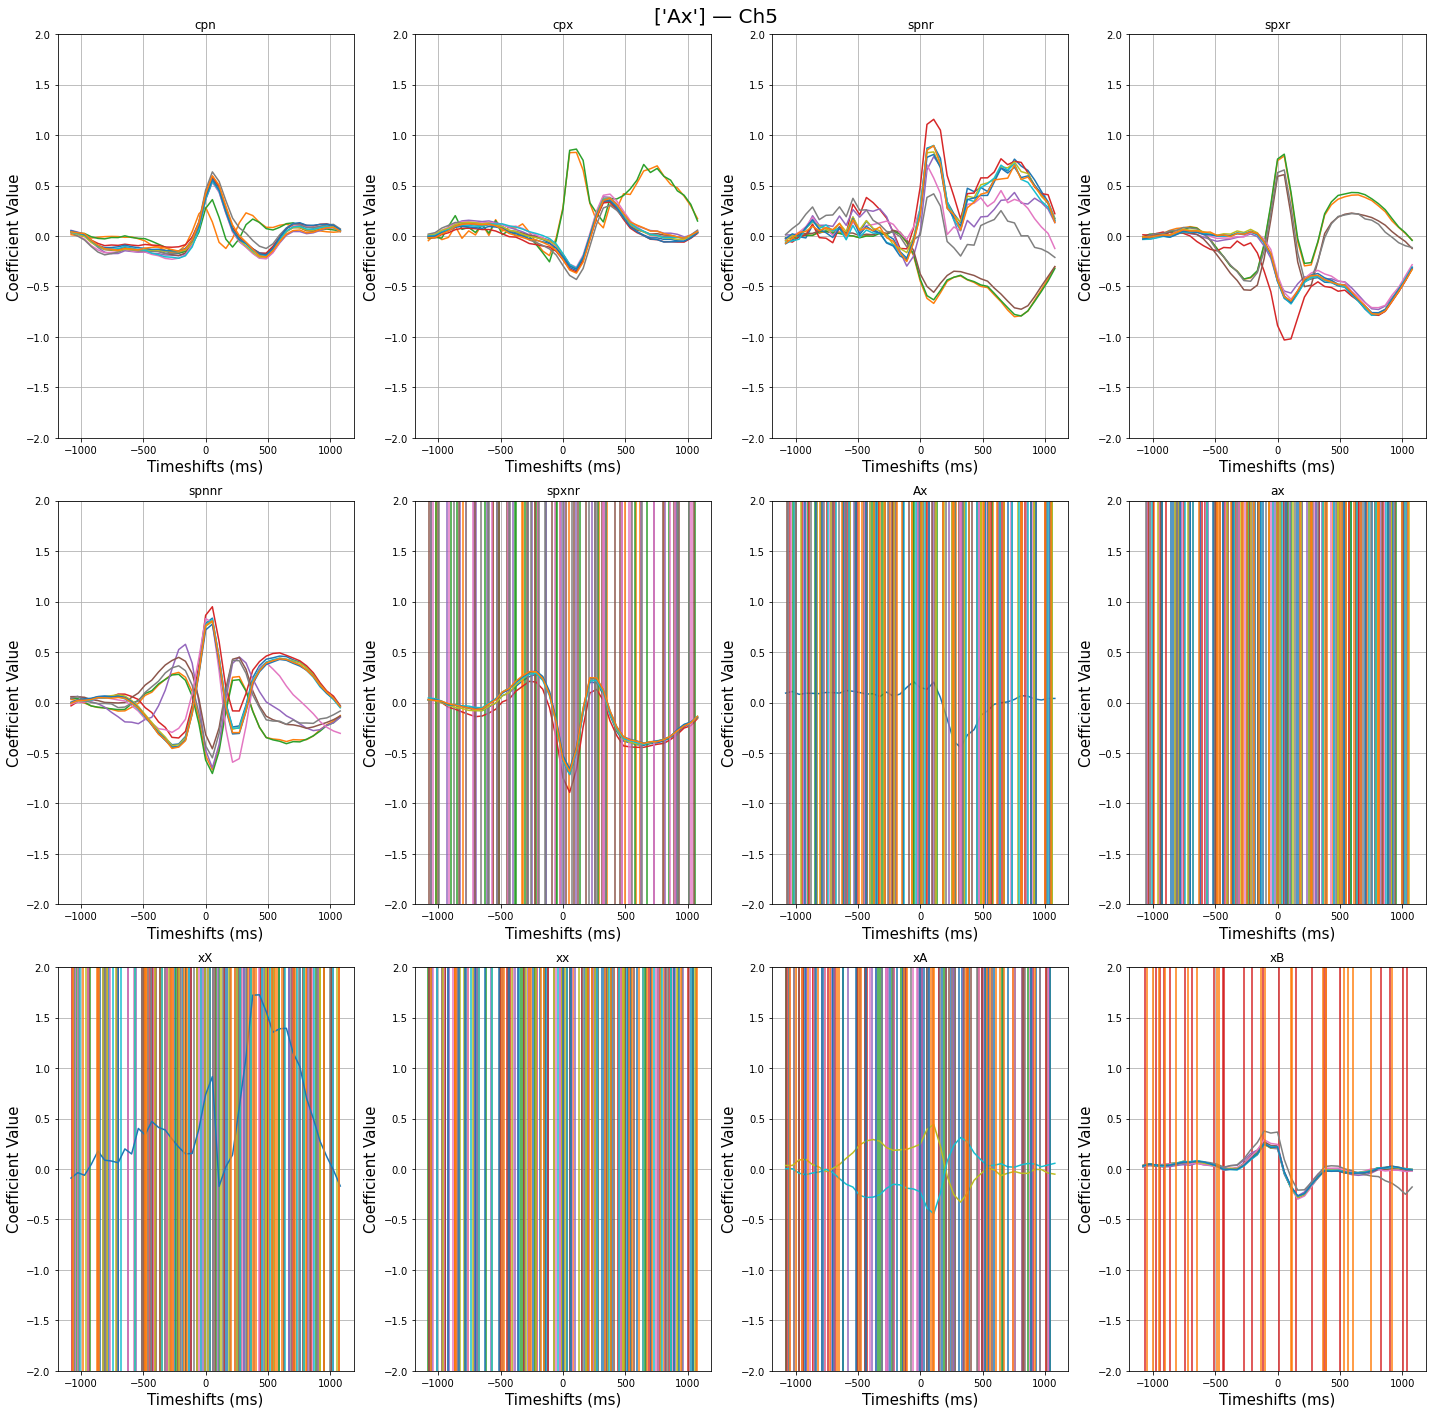

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:

prv_res = None

# for fit_res in fit_res_lst:

    # print(type(fit_res))
for ifr, fr in enumerate(fit_res_lst):
    
    fn = fr[0]
    fr = fr[1]
    
    print('fn:', fn, '-', ifr, type(fr))

    dc = fr['dropped_cols']
    rc = fr['response_col']
    hp = fr['hyperparams']


    if len(dc) > 0 and dc[0] == 'nTrial':
        continue
    if hp['l1_ratio'] > 0.0:
        continue
    # if hp['l1_ratio'] != 0:
    #     continue

    plt.figure()
    glm = fr['glm_model_gss']
    X_cols_plot = gdat.data['X_cols']
    X_cols_plot = [_ for _ in X_cols_plot if _ not in fr['dropped_cols']]
    X_cols_sftd_plot = sglm_ez.add_timeshifts_to_col_list(X_cols_plot, X_cols_plot[1:], neg_order=gdat.data['negorder'], pos_order=gdat.data['posorder'])
    X_cols_plot = [_ for _ in X_cols_plot if _ != 'nTrial']
    X_cols_sftd_plot = [_ for _ in X_cols_sftd_plot if _ != 'nTrial']

    col_coef_ids = np.array([('_intercept', glm.intercept_)] + [(col, glm.coef_[icol]) for icol, col in enumerate(X_cols_sftd_plot)])
    if ifr == 0:
        coef_df = pd.DataFrame(col_coef_ids[:, 1], index=col_coef_ids[:, 0], columns=[f'coeff_{rc}'])
    else:
        coef_df[f'coeff_{rc}'] = pd.Series(col_coef_ids[:, 1], index=col_coef_ids[:, 0], name=f'coeff_{rc}')

    # print(len(fr['dropped_cols']))
    # print(len(X_cols_plot))
    # print(len(X_cols_sftd_plot))

    bounds = (-2.0, 2.0)

    if prv_res != rc:
        if prv_res is not None:
            axs[0,1].legend()
            for ax in axs.reshape(-1):
                ax.grid(True)
            plt.show()
        

        fig, axs = splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                            X_cols_sftd_plot,
                            plot_width=4,
                            # y_lims=(-2.0, 2.0),
                            y_lims=bounds,
                            # filename=f'{fn}_coeffs.png',
                            binsize=54,
                            plot_name=f'{dc} — {rc}',
                            # label='Mean Coefficients'
                            label=f'{fn} - {hp}'
                            )
    else:
        splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                            X_cols_sftd_plot,
                            plot_width=4,
                            y_lims=bounds,
                            binsize=54,
                            plot_name=f'{dc} — {rc}',
                            fig=fig,
                            axs=axs,
                            label=f'{fn} - {hp}'
                            )
    prv_res = rc


axs[0,1].legend()
for ax in axs.reshape(-1):
    ax.grid(True)
plt.show()

plt.close('all')


# Try an alpha of 100
# Compare the proportional compression of L1/L2 regularization
# 1. Increase the richness of hte model to fit better
# 2. Start running analyses across all sessions for the animal
# 3. Take regression -- only on all channels

In [ ]:
coef_df.index = ['_intercept'] + [_.split('_')[0]+'_'+(str(int(_.split('_')[-1]) if len(_.split('_')) > 1 else '0').zfill(3)) for _ in coef_df.index if _ != '_intercept']

In [ ]:
coef_df.sort_index()

In [ ]:
reorg_df_inx = ['_intercept']
for basis in X_cols_plot:
    reorg_df_inx += [_ for _ in reversed(sorted(coef_df.index)) if basis in _ if '-' in _] + [_ for _ in sorted(coef_df.index) if basis in _ if '-' not in _]

In [ ]:
coef_df.loc[reorg_df_inx].to_csv('./coefficients-for-bernardo-WT61-63-64.csv')

In [ ]:
for basis in X_cols_plot:
    fig, ax = plt.subplots(1,1)
    coef_df.loc[[_ for _ in reversed(sorted(coef_df.index)) if basis in _ if '-' in _] + [_ for _ in sorted(coef_df.index) if basis in _ if '-' not in _]].astype(float).plot(ax=ax)
    ax.set_ylim((-2, 2))

In [ ]:
X_cols_sftd_plot

In [ ]:
# Summary for the mouse
# 1. Chase down the regularization parameters
# Pool data across sessions and explore regularization
# Continue doing session by session and add regularization there
# 
# Conatenate all of the data and fit a simple OLS

# 2. Do the leave out analysis

In [ ]:
exmn = [_ for _ in fit_res_lst if 'r_concat_GLM_SIGNALS_WT63_11222021' in _[0]]

In [ ]:
[_[2].data.keys() for _ in exmn]

In [ ]:

# [_[1].keys() for _ in exmn]
[(_[2].data['X_cols'], _[2].data['basedata'][_[2].data['X_cols']]) for _ in exmn][0][1].drop('nTrial', axis=1).iloc[20400:20500].plot()

In [ ]:
f = [(_[2].data['X_cols'], _[2].data['basedata'][_[2].data['X_cols']]) for _ in exmn][0][1].drop('nTrial', axis=1).sum(axis=1)
f2 = [(_[2].data['X_cols'], _[2].data['basedata'][_[2].data['X_cols']]) for _ in exmn][0][1].drop('nTrial', axis=1).iloc[:, [3, 5]].sum(axis=1)
[(_[2].data['X_cols'], _[2].data['basedata'][_[2].data['X_cols']]) for _ in exmn][0][1].drop('nTrial', axis=1)[(f == 2)&(f2 == 2)].query('cpn == 0')

In [ ]:
sglm_val = [gdat_dct[k] for k in gdat_dct if '11222021' in k][0]
sglm_val.data['basedata'][['rpn', 'lpn', 'rl', 'll', 'r', 'nr', 'r_trial', 'nr_trial']].iloc[20400:20450].plot()
(sglm_val.data['basedata'][['rpnnr']].iloc[20400:20450]*2).plot()
# (sglm_val.data['basedata'][['spn', 'spnr', 'spnnr']].iloc[20400:20450]*2).plot()
# (sglm_val.data['basedata'][['spn', 'spnr', 'spnnr']].iloc[20400:20450]*2).plot()


In [ ]:
# exmn = [_ for _ in fit_res_lst if 'new_lynne_mn2l2_only_refac_GLM_SIGNALS_WT63_11082021' in _[0]]
# exmn = [_ for _ in fit_res_lst if 'new_lynne_mn2l2_only_refac_GLM_SIGNALS_WT63_11162021' in _[0]]
# exmn = [_ for _ in fit_res_lst if 'new_lynne_mn2l2_only_refac_GLM_SIGNALS_WT63_11182021' in _[0]]
exmn = [_ for _ in fit_res_lst if 'r_concat_GLM_SIGNALS_WT63_11222021' in _[0]]


In [ ]:
exmn

In [ ]:
# X_cols_plot = [_[2].data['X_cols'] for _ in exmn][0]
# X_cols_plot = [_ for _ in X_cols_plot if _ not in fr['dropped_cols']]
# X_cols_sftd_plot = sglm_ez.add_timeshifts_to_col_list(X_cols_plot, X_cols_plot[1:], neg_order=gdat.data['negorder'], pos_order=gdat.data['posorder'])
# X_cols_plot = [_ for _ in X_cols_plot if _ != 'nTrial']
# X_cols_sftd_plot = [_ for _ in X_cols_sftd_plot if _ != 'nTrial']

num_coef = 6
print([_[2].data['X_cols'][1:] for _ in exmn][0][num_coef])

plt.plot([[__ for __i, __ in enumerate(_[1]['glm_model_gss'].coef_) if __i%7 == num_coef] for _ in exmn][0])

# [_[1]['glm_model_gss'].coef_ for _ in exmn]


In [ ]:
resp1 = exmn[4][2].data['basedata']['resp1']
resp1.mean(), resp1.std()

In [ ]:
exmn[4][2].data['basedata']['resp1'].plot()

In [ ]:
exmn[4][2].data['basedata']['resp1'].plot()

In [ ]:
# import matplotlib.pyplot as plt

# fit_res = [_ for _ in gdat.data['fit_results']]
# prv_res = None

# # fit_res_lst = [[_ for _ in gdat.data['fit_results']] for gdat in gdat_lst]
# # prv_res = None

# # for fit_res in fit_res_lst:
#     for ifr, fr in enumerate(fit_res):
#         dc = fr['dropped_cols']
#         rc = fr['response_col']
#         hp = fr['hyperparams']

#         if len(dc) > 0 and dc[0] == 'nTrial':
#             continue
#         if hp['l1_ratio'] > 0.01:
#             continue

#         plt.figure()
#         glm = fr['glm_model_gss']
#         X_cols_plot = gdat.data['X_cols']
#         X_cols_plot = [_ for _ in X_cols_plot if _ not in fr['dropped_cols']]
#         X_cols_sftd_plot = sglm_ez.add_timeshifts_to_col_list(X_cols_plot, X_cols_plot[1:], neg_order=gdat.data['negorder'], pos_order=gdat.data['posorder'])
#         X_cols_plot = [_ for _ in X_cols_plot if _ != 'nTrial']
#         X_cols_sftd_plot = [_ for _ in X_cols_sftd_plot if _ != 'nTrial']

#         # print(len(fr['dropped_cols']))
#         # print(len(X_cols_plot))
#         # print(len(X_cols_sftd_plot))

#         if prv_res != rc:
#             if prv_res is not None:
#                 axs[0,1].legend()
#                 for ax in axs.reshape(-1):
#                     ax.grid()
#                 plt.show()
            
#             fig, axs = splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
#                                 X_cols_sftd_plot,
#                                 plot_width=2,
#                                 y_lims=(-2.0, 2.0),
#                                 # filename=f'{fn}_coeffs.png',
#                                 binsize=50,
#                                 plot_name=f'{dc} — {rc}',
#                                 # label='Mean Coefficients'
#                                 label=f'{hp}'
#                                 )
#         else:
#             splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
#                                 X_cols_sftd_plot,
#                                 plot_width=2,
#                                 y_lims=(-2.0, 2.0),
#                                 binsize=50,
#                                 plot_name=f'{dc} — {rc}',
#                                 fig=fig,
#                                 axs=axs,
#                                 label=f'{hp}'
#                                 )
#         prv_res = rc


#     axs[0,1].legend()
#     for ax in axs.reshape(-1):
#         ax.grid()
#     plt.show()

#     plt.close('all')

In [ ]:

# sys.path.append(f'./sabatinilab-glm/backend')
# sys.path.append(f'./..')
# sys.path.append(f'./backend')
# sys.path.append(f'./../backend')
# import sglm_plt as splt
# # fig, axs = splt.plot_all_beta_coefs(mean_coeffs, X_cols_plot,
# #                         X_cols_sftd_plot,
# #                         plot_width=2,
# #                         y_lims=(-0.5, 0.5),
# #                         # filename=f'{fn}_coeffs.png',
# #                         binsize=50,
# #                         label='Mean Coefficients'
# #                         )

# for icoef, coef in enumerate(coef_lst):

#     splt.plot_all_beta_coefs(coef_lst[icoef], X_cols_plot,
#                             X_cols_sftd_plot,
#                             plot_width=2,
#                             y_lims=(-0.6, 0.6),
#                             # filename=f'{fn}_coeffs.png',
#                             binsize=50,
#                             fig=fig,
#                             axs=axs,
#                             label=f'Session {icoef+1} — {coef_fn_lst[icoef]}'
#                             )

# for ax in axs.reshape(-1):
#     ax.grid()

# axs[0, 0].legend()
# # break


In [ ]:
# import matplotlib.pyplot as plt
# # for x_val in ['alpha', 'l1_ratio']:
# #     plt.figure()
# #     plt.scatter(df[x_val], df['holdout_witi'], alpha=0.2)
# #     plt.scatter(df[x_val], df['holdout_noiti'], alpha=0.2)
# #     plt.scatter(df[x_val], df['gss_witi'], alpha=0.2)
# #     plt.title(x_val)

# for q in ['zsgdFF', 'zsrdFF']:
#     dfq = df.query(f"response == '{q}'")
#     for x_val in ['alpha', 'l1_ratio']:
#         for y_val in ['alpha', 'l1_ratio']:
#             if x_val == y_val:
#                 continue
#             plt.figure()
#             plt.scatter(dfq[x_val], dfq[y_val], c=dfq['holdout_witi'], alpha=0.2)
#             plt.colorbar()
#             plt.title(q + ' - ' + x_val + '/' + y_val + ' - ' + 'holdout_witi')
#             plt.figure()
#             plt.scatter(dfq[x_val], dfq[y_val], c=dfq['holdout_noiti'], alpha=0.2)
#             plt.colorbar()
#             plt.title(q + ' - ' + x_val + '/' + y_val + ' - ' + 'holdout_noiti')
#             plt.figure()
#             plt.scatter(dfq[x_val], dfq[y_val], c=dfq['gss_witi'], alpha=0.2)
#             plt.colorbar()
#             plt.title(q + ' - ' + x_val + '/' + y_val + ' - ' + 'gss_witi')


In [ ]:
# for x_val in ['alpha', 'l1_ratio']:
#     plt.figure()
#     plt.scatter(df[x_val], df['holdout_witi'], alpha=0.2)
#     plt.scatter(df[x_val], df['holdout_noiti'], alpha=0.2)
#     plt.scatter(df[x_val], df['gss_witi'], alpha=0.2)
#     plt.title(x_val)

In [ ]:
# [(_['glm_model_gss'].coef_, _['glm_model_gss'].intercept_) for _ in gdat.data['fit_results']]